In [3]:
"""
Title: Soft_Maximal_Margin_Classifier 
Author:  Reza Rawassizadeh, Yi Rong from Boston University
Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb

"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets import make_blobs
from matplotlib.colors import LinearSegmentedColormap

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


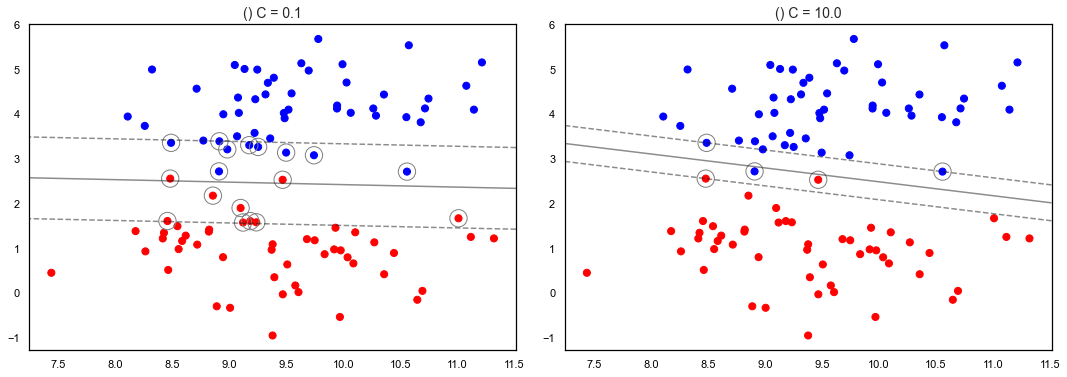

In [6]:
# change the color of dots
colors = [(1, 0, 0),  (0, 0, 1)]  # R -> B
cmap_name = 'my_list'
rezacm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=2)


# make the bg white
plt.rcParams['axes.facecolor'] = 'white'
# make border black

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=4, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [0.1, 10.0]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50,  cmap=rezacm)
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none', color=['grey']);
   
    axi.set_title(alpha + ' C = {0:.1f}'.format(C), size=14)
    

# Set the borders to a black color...
for a in ax:
    a.tick_params(color='black', labelcolor='black')
    for spine in a.spines.values():
        spine.set_edgecolor('black')
        
plt.savefig("maxmargin", dpi=400)